In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.33)

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print(accuracy)

0.94


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.33, random_state = 0)

K = [1, 5, 10]
for k in K:
    y_pred = []
    for x_test in X_test:
        distances = np.array([np.sum((x_test - x_train)**2) for x_train in X_train])
        nearest_indexes = distances.argsort()[:k]
        nearest_labels = y_train[nearest_indexes]
        c = Counter(nearest_labels)
        y_pred.append(c.most_common()[0][0])
    print("k = {}, accuracy = {}".format(k,np.mean(y_pred == y_test)))

k = 1, accuracy = 0.96
k = 5, accuracy = 0.98
k = 10, accuracy = 0.98


In [4]:
from sklearn import svm
from sklearn.datasets import load_svmlight_file
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import numpy as np

X,y = load_svmlight_file('/Users/takei/Desktop/newcomer/MachineLearning/disorder.libsvm.dat')
lsvm = LinearSVC()
scores = cross_val_score(lsvm, X, y, cv = 5)
print(np.mean(scores))

0.9092175756610879


0.9036313742547911


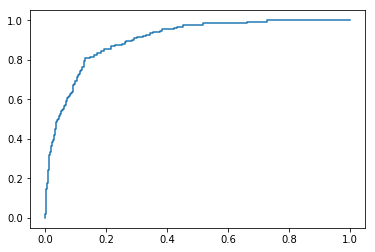

In [5]:
from sklearn import svm
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

X,y = load_svmlight_file('/Users/takei/Desktop/newcomer/MachineLearning/disorder.libsvm.dat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
lsvm = SVC(kernel='linear',C=1, probability=True)
lsvm.fit(X_train, y_train)
y_pred = lsvm.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)
plt.plot(fpr, tpr)
plt.show()

## 単純なfor文を用いた実装

In [6]:
from sklearn import svm
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

cost_param = [0.001, 0.01, 0.1, 1, 10, 100]
best_auc = 0
best_cost_param = 0
X,y = load_svmlight_file('/Users/takei/Desktop/newcomer/MachineLearning/disorder.libsvm.dat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
for c in cost_param:
    lsvm = SVC(kernel = 'linear', C = c, probability = True)
    lsvm.fit(X_train, y_train)
    y_pred = lsvm.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    if auc > best_auc:
        best_auc = auc
        best_cost_param = c
print("best C: {},best auc: {}".format(best_cost_param,best_auc))

best C: 0.01,best auc: 0.9472228974234324


## scikit learnのGridSeachを用いた実装

In [8]:
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics


param_grid = {'C':[0.001,0.01,0.1,1,10,100]}
X,y = load_svmlight_file('/Users/takei/Desktop/newcomer/MachineLearning/disorder.libsvm.dat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, scoring= 'roc_auc')
grid_search.fit(X_train, y_train)
best_c = grid_search.best_params_
print(best_c)
print('best_auc: {}'.format(metrics.roc_auc_score(y_test, grid_search.decision_function(X_test))))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.01}
best_auc: 0.9472117032981091
